In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV



In [3]:
X = pd.read_csv('pca40_2regions.csv')
y = pd.read_csv('train_labels.csv', header=None)

In [4]:
y = pd.Series(y[0].replace({'face':0, 'house':1}))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    
}

/Users/alexiswu/Desktop/neurotech/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Logistic Regression:
 accuracy is 0.9815 
 f1 score is 0.9825
SVM:
 accuracy is 1.0000 
 f1 score is 1.0000
Decision Tree:
 accuracy is 1.0000 
 f1 score is 1.0000
Random Forest:
 accuracy is 0.9630 
 f1 score is 0.9643
KNN:
 accuracy is 0.9815 
 f1 score is 0.9825


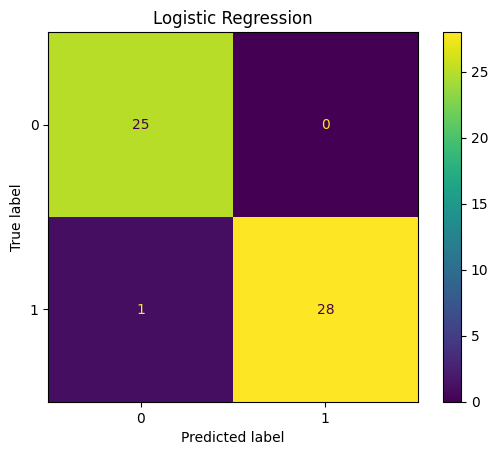

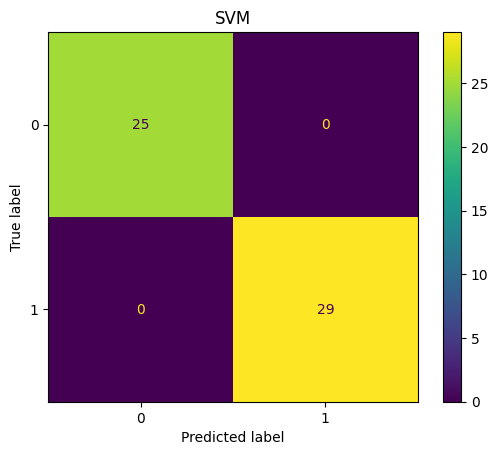

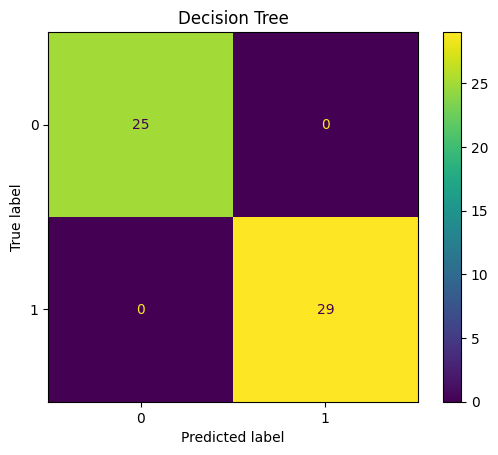

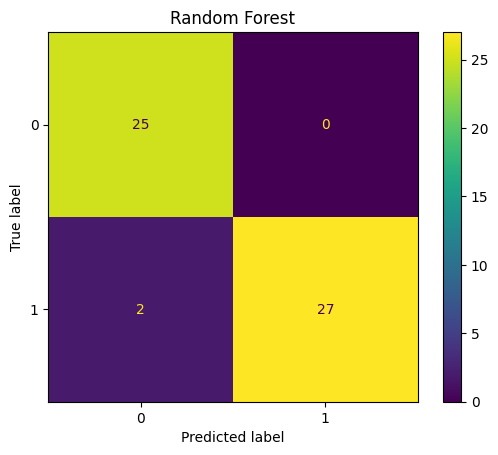

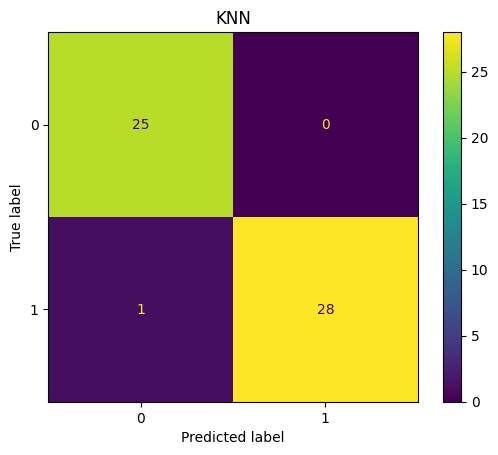

In [7]:
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    if name == 'KNN':
        y_pred = clf.predict(X_test.values)
    else:
        y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[name] = [accuracy, f1]
    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()
    plt.title(name)


for name, [accuracy, f1] in results.items():
    print(f"{name}:\n accuracy is {accuracy:.4f} \n f1 score is {f1:.4f}")

## Fine Tune
### Logistic Regression

In [8]:
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 10, 1000], #the inverse of regularization strength
    'penalty': ['l1', 'l2']
}

In [9]:
grid_search_lr = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid_lr, cv=5)
grid_search_lr.fit(X_train, y_train)
best_params_lr = grid_search_lr.best_params_

y_pred_lr = grid_search_lr.best_estimator_.predict(X_test)

# Calculate accuracy and F1 score
accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print(f"Logistic Regression - Accuracy: {accuracy_lr:.4f}, F1 Score: {f1_lr:.4f}")
print(f"The best parameters are {best_params_lr}")

Logistic Regression - Accuracy: 0.9815, F1 Score: 0.9825
The best parameters are {'C': 0.1, 'penalty': 'l2'}


### Decision Tree

In [10]:
param_grid_dt = {
    'max_depth': [None, 5, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'criterion': ['gini', 'entropy']
}

grid_search_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5)

grid_search_dt.fit(X_train, y_train)

y_pred_dt = grid_search_dt.best_estimator_.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print(f"Decision Tree - Accuracy: {accuracy_dt:.4f}, F1 Score: {f1_dt:.4f}")
print(f"The best parameters are {grid_search_dt.best_params_}")


Decision Tree - Accuracy: 0.9074, F1 Score: 0.9091
The best parameters are {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 8, 'min_samples_split': 2}


### KNN

In [11]:
param_grid_knn = {
    'n_neighbors': list(range(2, 31)),
    'p': [ 2,3,4,5,6]
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_search_knn.fit(X_train.values, y_train)

best_params_knn = grid_search_knn.best_params_
y_pred_knn = grid_search_knn.best_estimator_.predict(X_test.values)

# Calculate accuracy and F1 score
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print(f"KNN - Accuracy: {accuracy_knn:.4f}, F1 Score: {f1_knn:.4f}")
print(f"The best parameters are {best_params_knn}")

KNN - Accuracy: 0.9630, F1 Score: 0.9643
The best parameters are {'n_neighbors': 2, 'p': 3}


# Test

In [12]:
import load_test
from joblib import load


In [13]:
test_data, test_labels = load_test.load_test_data()

(163840,)


In [14]:
loaded_pca = load('save_params/pca_40_13.joblib')
loaded_scaler = load('save_params/scaler_40_13.joblib')

In [15]:
test_labels['label'] = test_labels[0].replace({'face':0, 'house':1})

In [16]:
y_test = test_labels.label

In [17]:
X_test = loaded_scaler.transform(test_data)


In [18]:
X_test = loaded_pca.transform(X_test)


## Logistic Regression

/Users/alexiswu/Desktop/neurotech/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Logistic Regression - Accuracy: 1.0000, F1 Score: 1.0000


Text(0.5, 1.0, 'Logistic Regression')

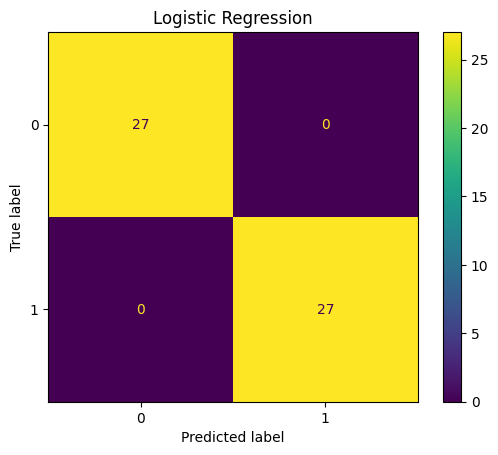

In [23]:
test_pred_lr = grid_search_lr.best_estimator_.predict(X_test)
accuracy_lr = accuracy_score(y_test, test_pred_lr)
f1_lr = f1_score(y_test, test_pred_lr)
print(f"Logistic Regression - Accuracy: {accuracy_lr:.4f}, F1 Score: {f1_lr:.4f}")
cm = confusion_matrix(y_test, test_pred_lr, labels=grid_search_lr.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search_lr.best_estimator_.classes_)
disp.plot()
plt.title("Logistic Regression")


Decision Tree - Accuracy: 0.6111, F1 Score: 0.5714


/Users/alexiswu/Desktop/neurotech/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Decision Tree')

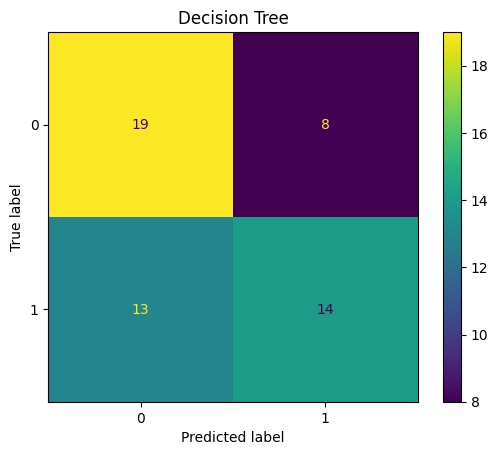

In [21]:
test_pred_dt = grid_search_dt.best_estimator_.predict(X_test)
accuracy_dt = accuracy_score(y_test, test_pred_dt)
f1_dt = f1_score(y_test, test_pred_dt)
print(f"Decision Tree - Accuracy: {accuracy_dt:.4f}, F1 Score: {f1_dt:.4f}")
cm = confusion_matrix(y_test, test_pred_dt, labels=grid_search_dt.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search_dt.best_estimator_.classes_)
disp.plot()
plt.title("Decision Tree")


KNN - Accuracy: 0.7778, F1 Score: 0.8065


Text(0.5, 1.0, 'KNN')

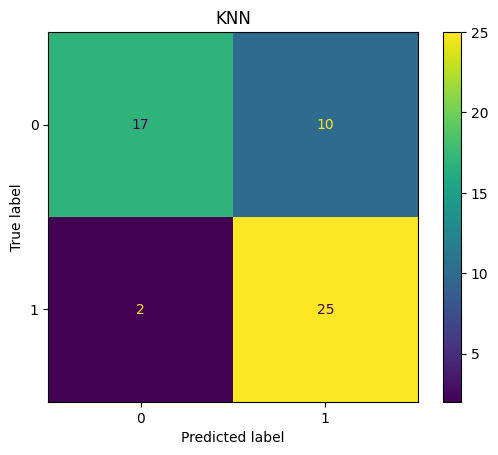

In [22]:
test_pred_knn = grid_search_knn.best_estimator_.predict(X_test)
accuracy_knn = accuracy_score(y_test, test_pred_knn)
f1_knn = f1_score(y_test, test_pred_knn)
print(f"KNN - Accuracy: {accuracy_knn:.4f}, F1 Score: {f1_knn:.4f}")
cm = confusion_matrix(y_test, test_pred_knn, labels=grid_search_knn.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search_knn.best_estimator_.classes_)
disp.plot()
plt.title("KNN")
